In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error


import warnings
warnings.filterwarnings('ignore')

In [2]:
sa= pd.read_csv('Salary.csv')
sa

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
# checking shape
sa.shape

(30, 2)

In [4]:
# checking data type
sa.dtypes

YearsExperience    float64
Salary               int64
dtype: object

In [5]:
# checking the data description
sa.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
# checking null value
sa.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

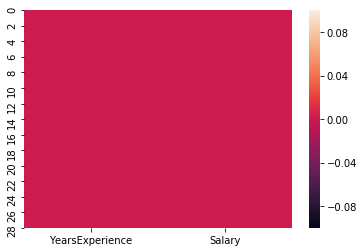

In [7]:
# heatmap of null value
sns.heatmap(sa.isnull())

In [8]:
# corelation between coloums
sa.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


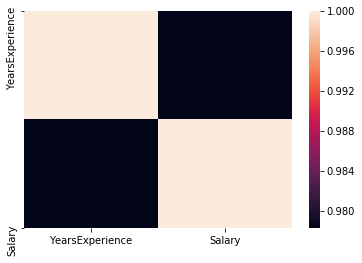

In [9]:
# heat map of corelation
corr_hmap=sa.corr()
sns.heatmap(corr_hmap)

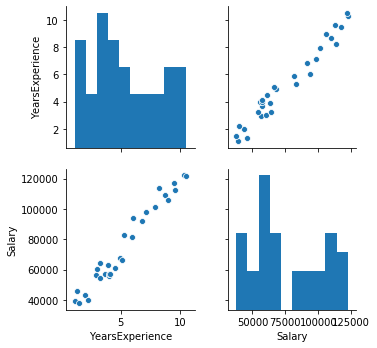

In [10]:
sns.pairplot(sa)

YearsExperience       AxesSubplot(0.125,0.125;0.352273x0.755)
Salary             AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

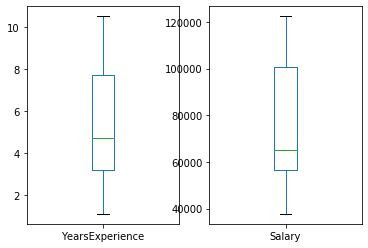

In [11]:
sa.plot(kind='box',subplots=True)

In [12]:
sa.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [13]:
# dividing dataset into input values 'x' and output value 'y'
x = sa.iloc[:, :-1].values
y = sa.iloc[:, 1].values

In [14]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

In [15]:
# function to find the maximum r2 score score against random state
def r_score(model):
    max_r_score=0
    for r_state in range(10,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.40,random_state=r_state)  
        model.fit(train_x,train_y)
        pred=model.predict(test_x) 
        
        r2_scor=r2_score(test_y,pred)
        if r2_scor>max_r_score:
            max_r_score=r2_scor
            final_r_state=r_state
    
    return final_r_state,max_r_score

In [16]:
# function to print the various informaion related to a particular model
def mod(state,model_name):
    for m in model:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.40,random_state=state)
        m.fit(train_x,train_y)
        pred=m.predict(test_x)

        score=cross_val_score(m,train_x,train_y,cv=3).mean()
    
        print(model_name,'model score is :',m.score(train_x,train_y),'\n')
        print('R2-score of',model_name,'model is :' ,r2_score(test_y,pred),'\n')
        print('The mean of cross_val_score for the',model_name,'model is:',score,'\n')
        print(model_name,'model cofficient is :',m.coef_,'\n')
        print(model_name,'model intercept is :',m.intercept_,'\n')
        print('Mean absolute error for',model_name,'model is : ',mean_absolute_error(test_y,pred),'\n')
        print('Mean squared error for',model_name,'model is : ',mean_squared_error(test_y,pred),'\n')
        print('Root mean squared error for',model_name,'model is : ',np.sqrt(mean_squared_error(test_y,pred)),'\n')

In [17]:
#LinearRegression
lm=LinearRegression()
print('Max R2-score crossponding to random state is:',r_score(lm))

final_r_state,max_r_score = r_score(lm)
lm_r2 = max_r_score

Max R2-score crossponding to random state is: (39, 0.9769638607934313)


In [18]:
ls=Lasso()
print('Max R2-score crossponding to random state is:',r_score(ls))

final_r_state,max_r_score = r_score(ls)
ls_r2 = max_r_score

Max R2-score crossponding to random state is: (39, 0.976961454725105)


In [19]:
rd=Ridge()
print('Max R2-score crossponding to random state is:',r_score(rd))

final_r_state,max_r_score = r_score(rd)
rd_r2 = max_r_score

Max R2-score crossponding to random state is: (14, 0.9811815479765439)


In [20]:
el=ElasticNet()
print('Max R2-score crossponding to random state is:',r_score(el))

final_r_state,max_r_score = r_score(el)
el_r2 = max_r_score

Max R2-score crossponding to random state is: (38, 0.9145672060325023)


In [21]:
# comparing the performances of all the model
model_performance = pd.DataFrame({
    'Model': ['LinearRegression','Lasso','Ridge','ElasticNet'],
    'Accuracy': [lm_r2,ls_r2,rd_r2,el_r2]
})

model_performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Ridge,0.981182
0,LinearRegression,0.976964
1,Lasso,0.976961
3,ElasticNet,0.914567


In [22]:
model=[Ridge()]
mod(state=14,model_name='Ridge')

Ridge model score is : 0.9380172679258908 

R2-score of Ridge model is : 0.9811815479765439 

The mean of cross_val_score for the Ridge model is: 0.9308887274678913 

Ridge model cofficient is : [25831.23294303] 

Ridge model intercept is : 76130.98720274356 

Mean absolute error for Ridge model is :  3256.8490533354466 

Mean squared error for Ridge model is :  14639610.519169753 

Root mean squared error for Ridge model is :  3826.1743973804637 



In [23]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.40,random_state=14)
rd=Ridge()
rd.fit(train_x,train_y)
pred=rd.predict(test_x)

score=cross_val_score(rd,train_x,train_y,cv=3).mean()
    
print('Ridge modrd score is :',rd.score(train_x,train_y),'\n')
print('R2-score of modrd is :' ,r2_score(test_y,pred),'\n')
print('The mean of cross_val_score for the modrd is:',score,'\n')
print('Modrd cofficient is :',rd.coef_,'\n')
print('Modrd intercept is :',rd.intercept_,'\n')
print('Mean absolute error for modrd is : ',mean_absolute_error(test_y,pred),'\n')
print('Mean squared error for modrd is : ',mean_squared_error(test_y,pred),'\n')
print('Root mean squared error for modrd is : ',np.sqrt(mean_squared_error(test_y,pred)),'\n')

Ridge modrd score is : 0.9380172679258908 

R2-score of modrd is : 0.9811815479765439 

The mean of cross_val_score for the modrd is: 0.9308887274678913 

Modrd cofficient is : [25831.23294303] 

Modrd intercept is : 76130.98720274356 

Mean absolute error for modrd is :  3256.8490533354466 

Mean squared error for modrd is :  14639610.519169753 

Root mean squared error for modrd is :  3826.1743973804637 



In [24]:
import joblib
# saving the model using pickle.
joblib.dump(rd,'rd_4. Salary Dataset.pkl')

['rd_4. Salary Dataset.pkl']